# Classification Report: Churn Analysis of Customers for a Telecom Company


# Author: Pranay Mohanty 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot

In [2]:
churn=pd.read_csv("churn.csv")

our dataset has Churn as the target variable with "True" meaning the customer will churn (discontinue with the service)  and "False" meaning customer will not churn (continue with  the service) 

In [3]:
churn.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [5]:
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# column descriptions 
#state (categorical)-Customer's residential state in the country
#account length (integer)- How long the account has been in use
#area code(integer) - code perticular to customer's location in the state
#phone (categorical) - customer's phone number which is unique to the customer 
#international plan (categorical)- customer may or may not have availed an international calling facility in his/her account
#voice mail plan (categorical) - may or may not avail that perticular service
#day mins (float) - for how long does the customer talk per day?
#day call (int) - how many calls per day?
#day charge(float)-how much is the customer charged on the day?
#evening mins(float)- how long does customer talk in the evening?
#evening calls(float)-how many calls during the evening?
#evening charge(flaot)-how much charged in the evening?
#night mins (float)
#night calls  (int)
#night charge (float)
#international mins (float)
#international calls (int)
#international charge (float)
#customer service calls (int) - how many calls to the call centre for reason pertaining to complain or service upgrade/degrade?
#churn (categorical)- yes or no, did he drop the service or not?

# Plots showing statewise churns

# - max in New Jearsey and Texas and minimun in states like Iowa, hawai and arkansas and maximun number of customers in west virginia

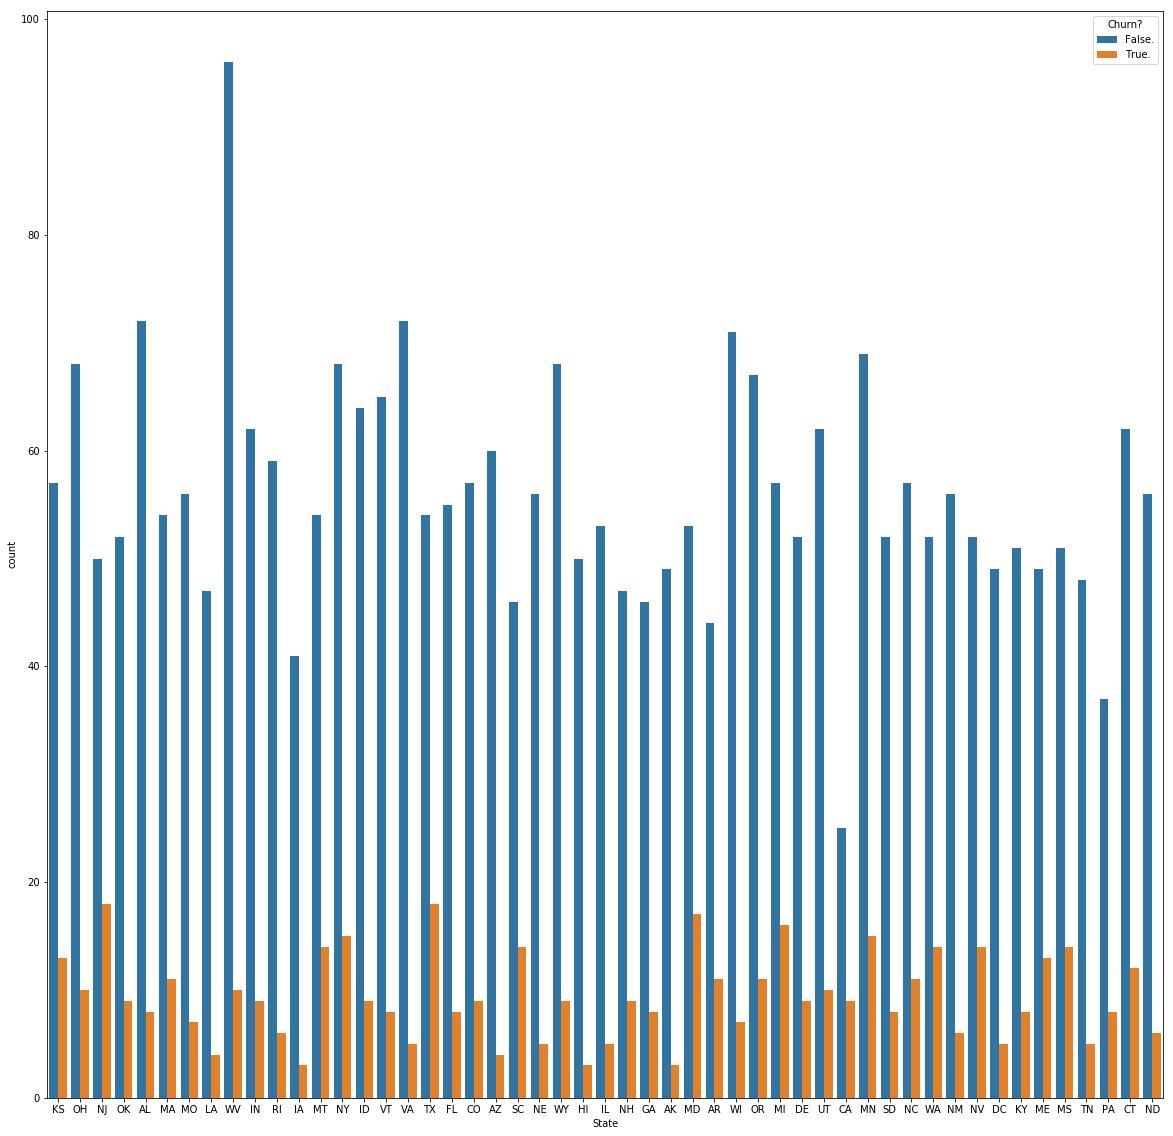

In [76]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,1,1)
fig=sns.countplot(x="State", data=churn,hue="Churn?")

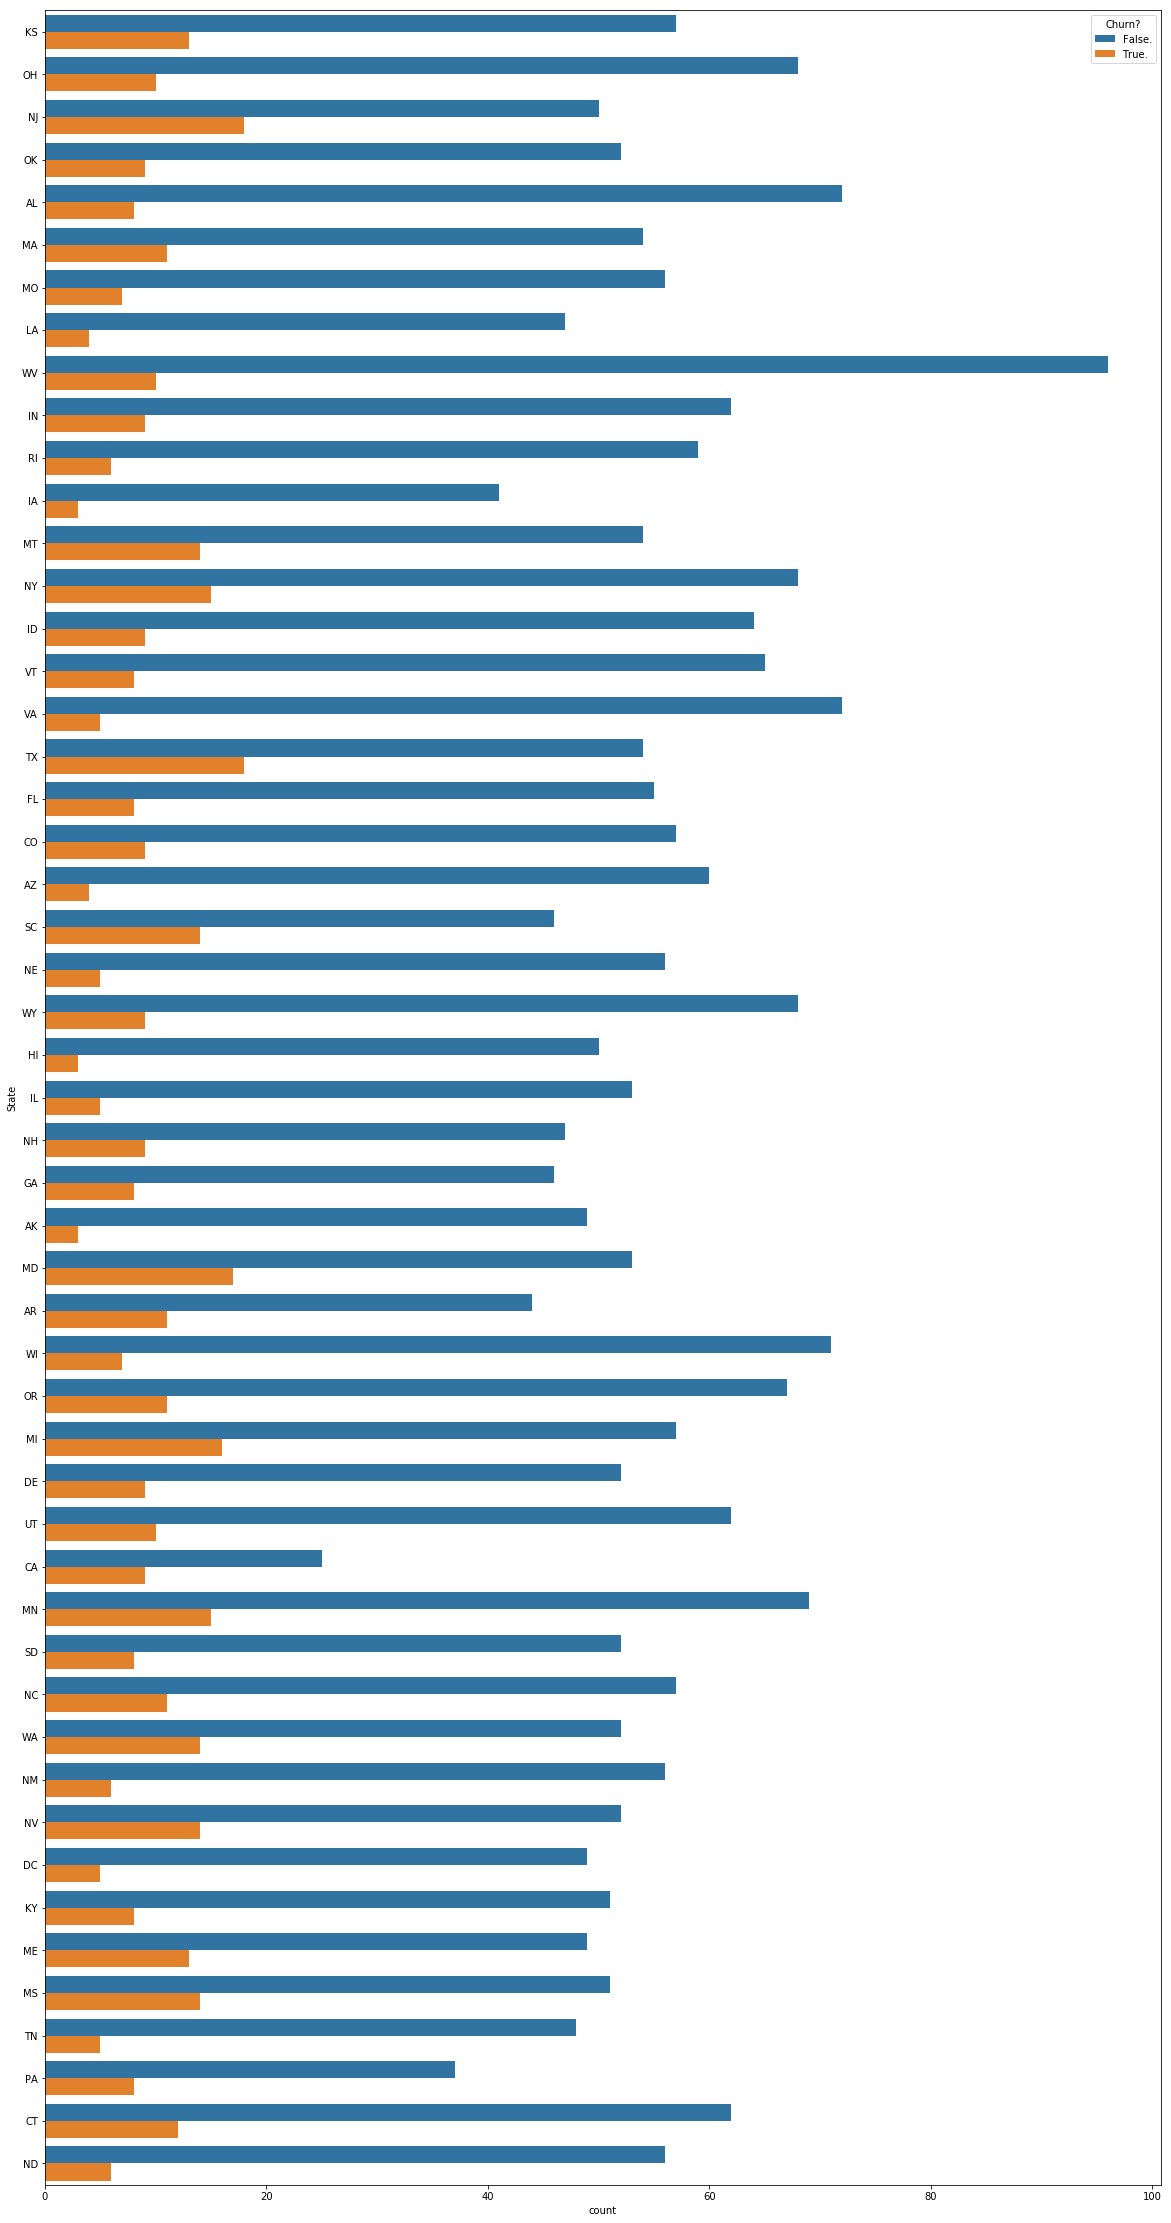

In [68]:
f, ax = plt.subplots(figsize=(20, 40))
sns.countplot(y="State", data=churn,hue="Churn?");

# Maximum international plans from Illinois and miumum in Iowa.

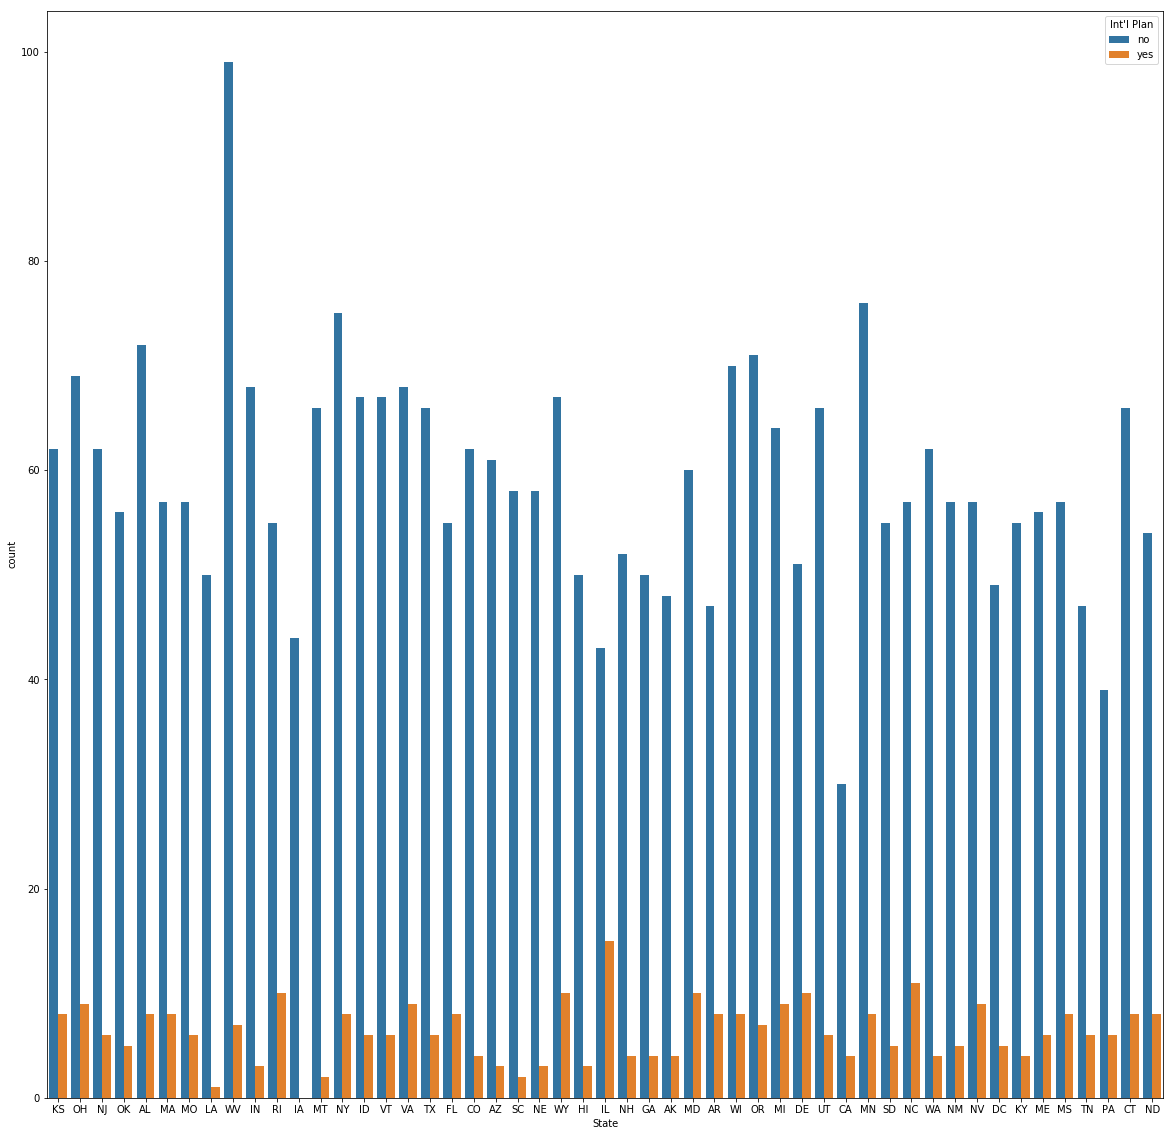

In [59]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,1,1)
fig=sns.countplot(x="State", data=churn,hue="Int'l Plan")

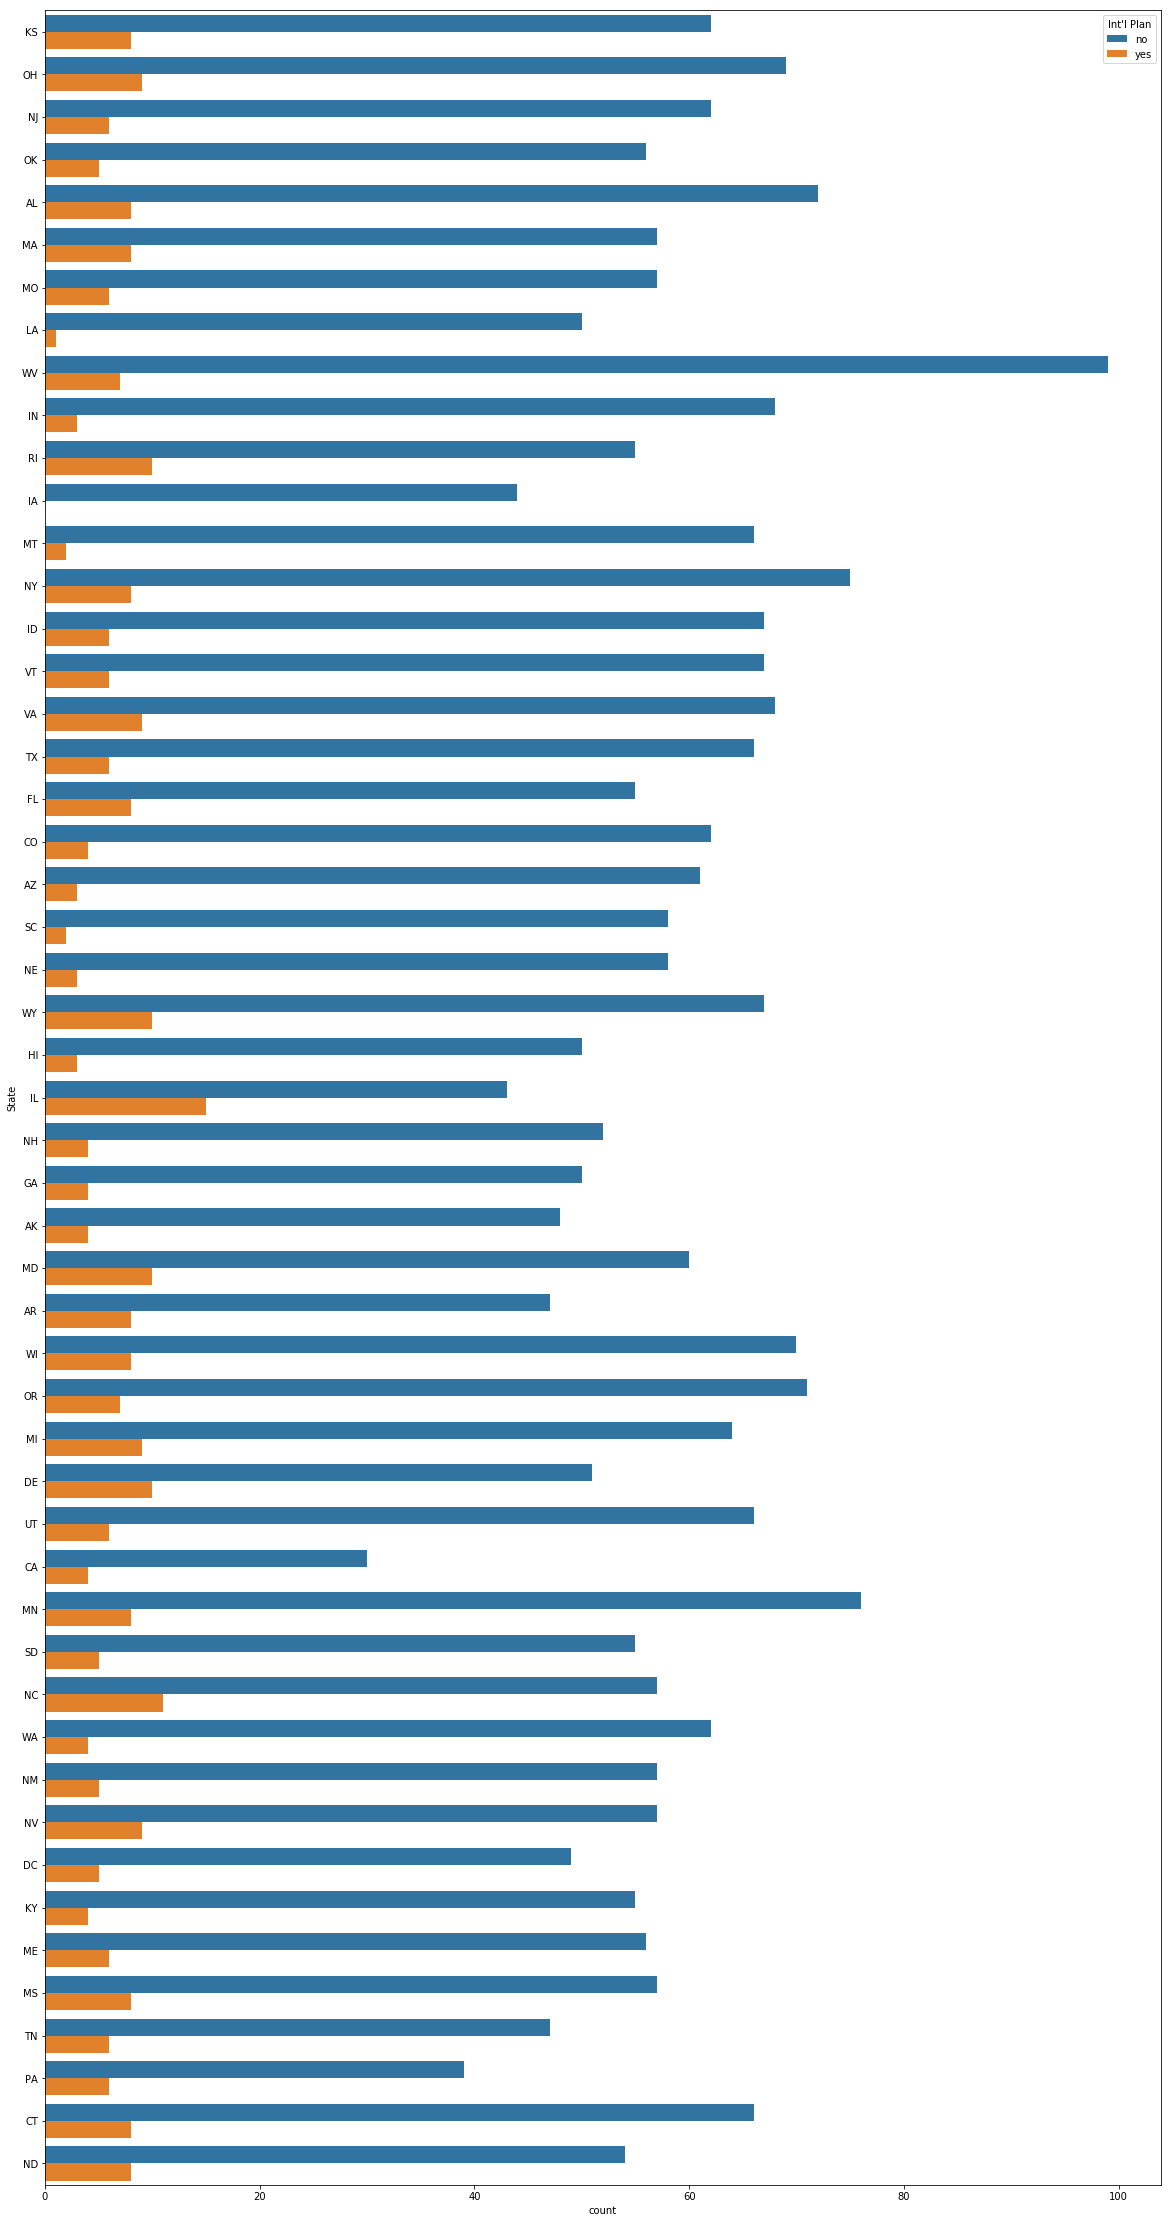

In [70]:
f, ax = plt.subplots(figsize=(20, 40))
sns.countplot(y="State", data=churn,hue="Int'l Plan");

# maxiumum voicemail plans from states such as west virginia ohia, idaho and mimum from washington and california 

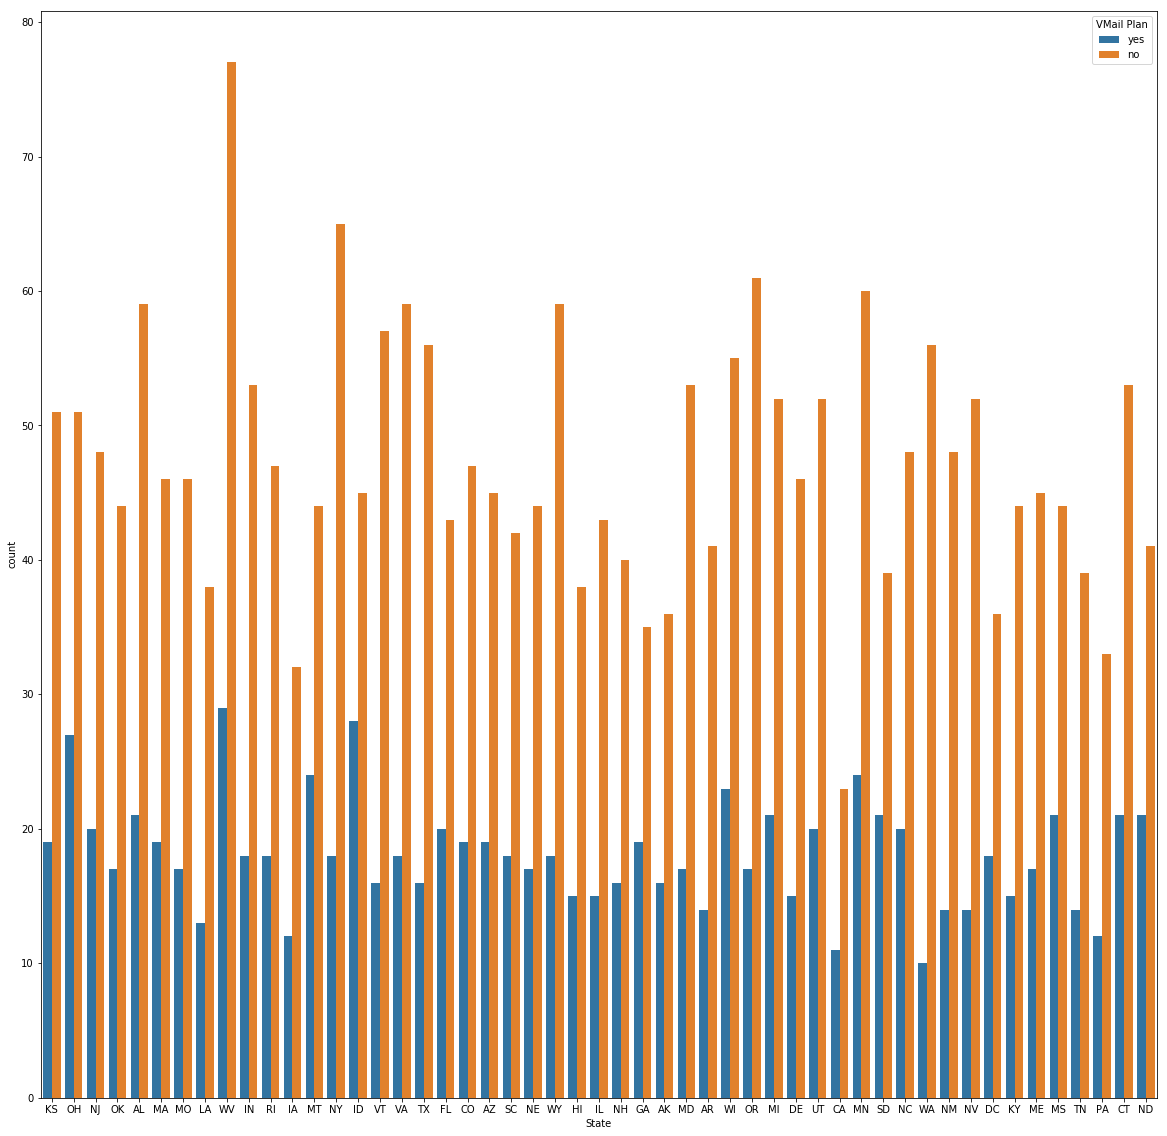

In [60]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,1,1)
fig=sns.countplot(x="State", data=churn,hue="VMail Plan")

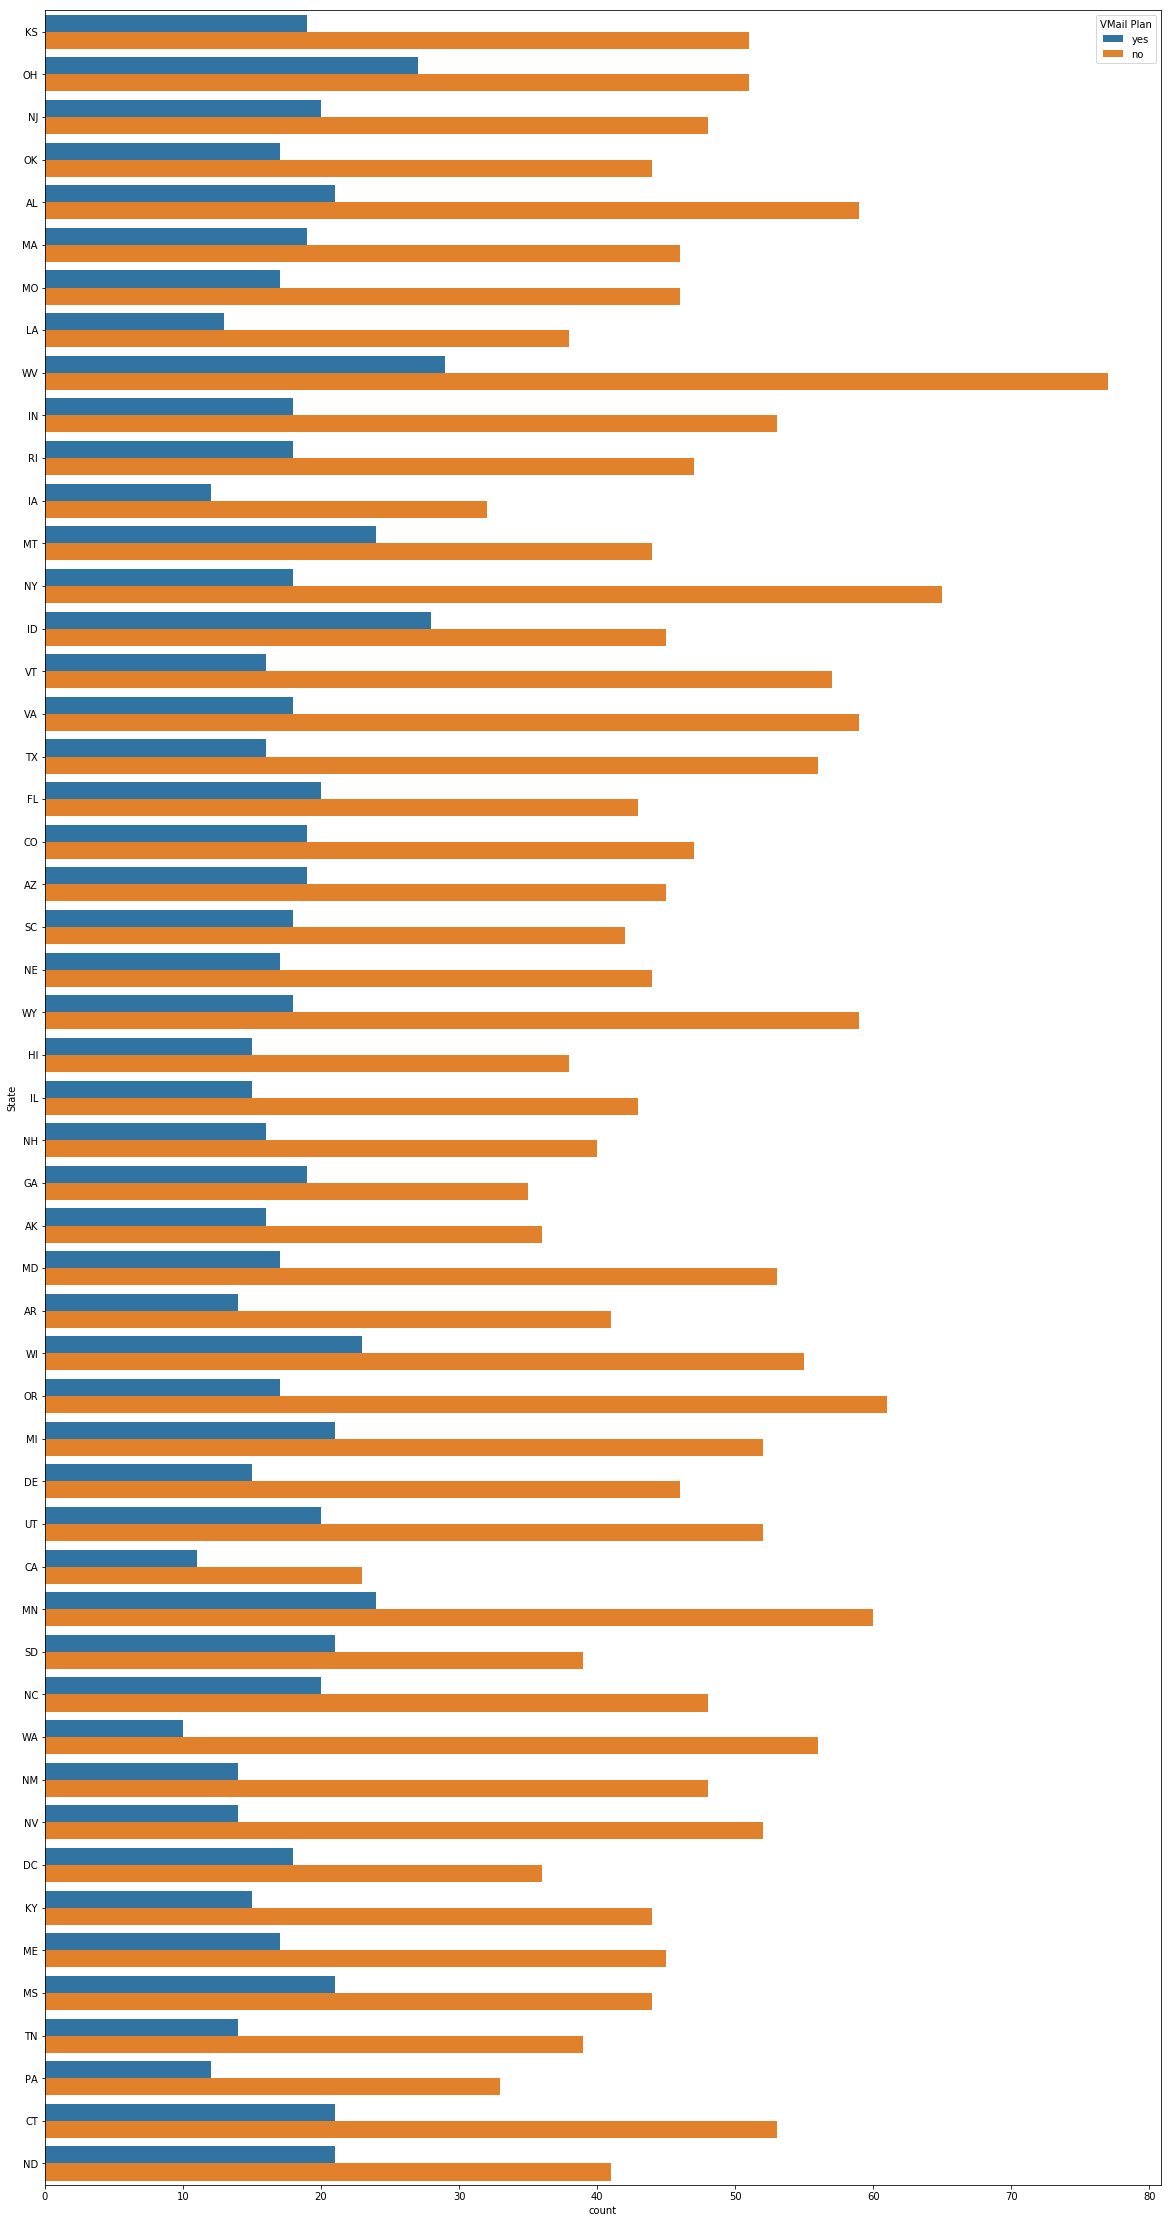

In [71]:
f, ax = plt.subplots(figsize=(20,40))
sns.countplot(y="State", data=churn,hue="VMail Plan");

# Of people who have churned, average customer calls seems to highest in Arkansas (~4) and least in Ohio which is 1.


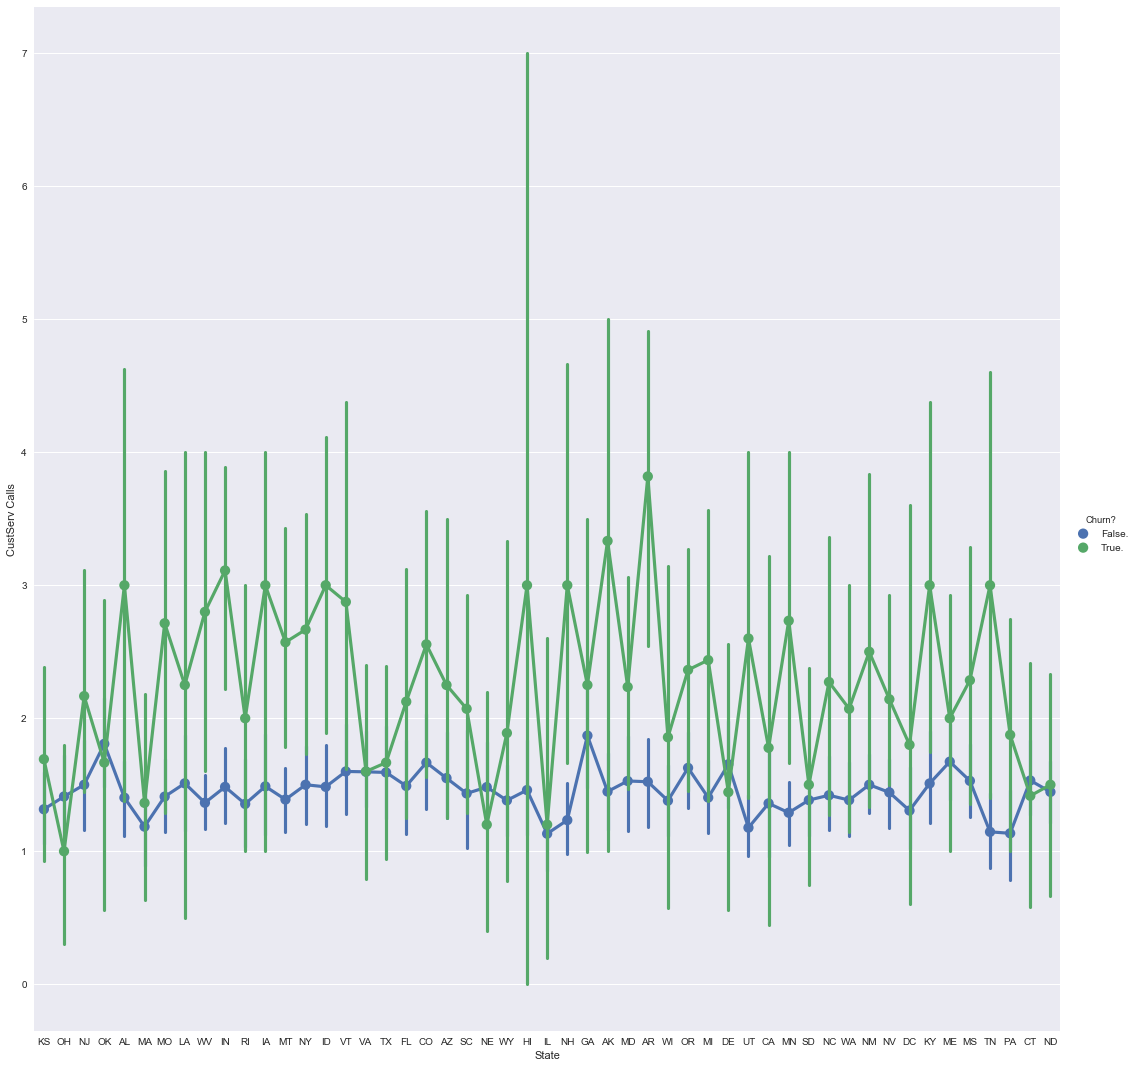

In [96]:
figure=sns.factorplot(x="State", y="CustServ Calls",data=churn,hue="Churn?",size=15)

# again, of the people who have churned, average account length highest in Arkansas and minimum in Iowa 

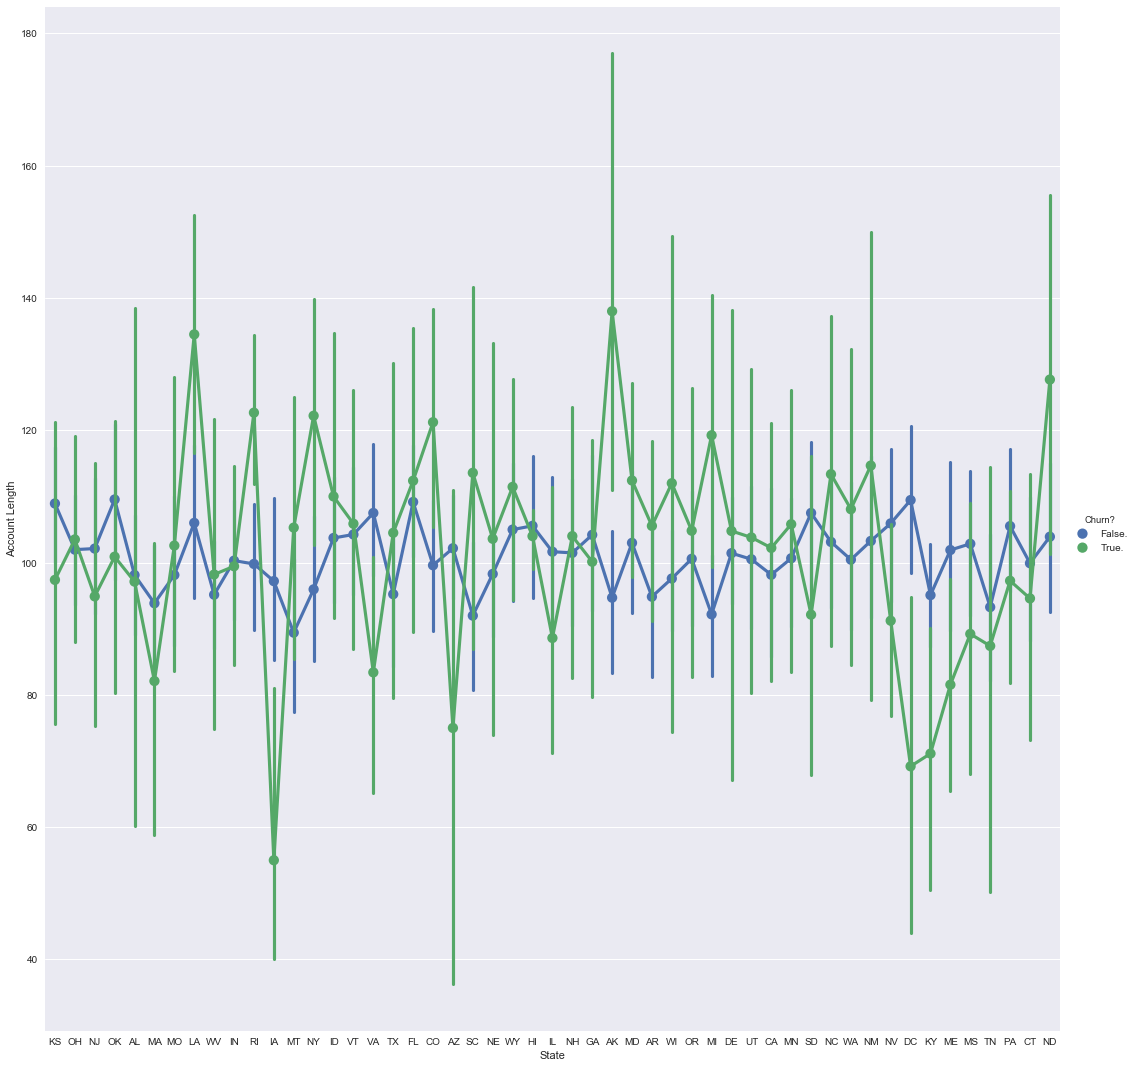

In [98]:
figure=sns.factorplot(x="State", y="Account Length",data=churn,hue="Churn?",size=15)

# Histograms

# International minutes is lower than the day, night and evening minutes

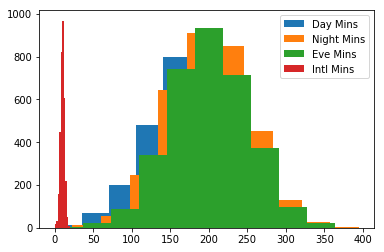

In [10]:
plt.hist(x="Day Mins",data=churn,label="Day Mins")
plt.hist(x="Night Mins",data=churn,label="Night Mins")
plt.hist(x="Eve Mins",data=churn,label="Eve Mins")
plt.hist(x="Intl Mins",data=churn,label="Intl Mins")

plt.legend()

# we notice that the day charge is towards the higher side 

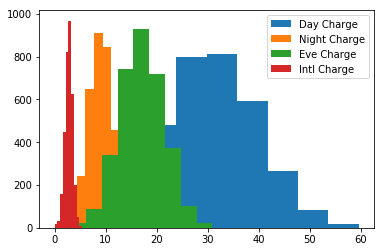

In [11]:
plt.hist(x="Day Charge",data=churn,label="Day Charge")
plt.hist(x="Night Charge",data=churn,label="Night Charge")
plt.hist(x="Eve Charge",data=churn,label="Eve Charge")
plt.hist(x="Intl Charge",data=churn,label="Intl Charge")
plt.legend()

# The distribution of Day, Night and Evenings calls are almost similiar but International calls is towards lower side

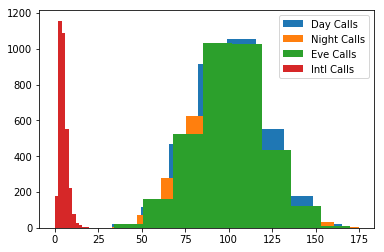

In [12]:
plt.hist(x="Day Calls",data=churn,label="Day Calls")
plt.hist(x="Night Calls",data=churn,label="Night Calls")
plt.hist(x="Eve Calls",data=churn,label="Eve Calls")
plt.hist(x="Intl Calls",data=churn,label="Intl Calls")

plt.legend()

# customer service calls slightly skewed

(array([  697.,  1181.,   759.,   429.,   166.,    66.,    22.,     9.,
            2.,     2.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

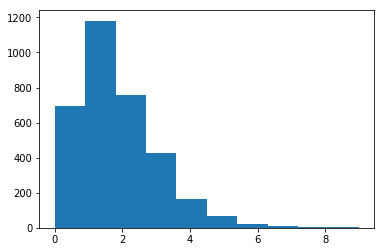

In [18]:
plt.hist(x="CustServ Calls",data=churn)

# International calls distribution

(array([  178.,  1157.,  1091.,   554.,   225.,    78.,    29.,    13.,
            3.,     5.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 10 Patch objects>)

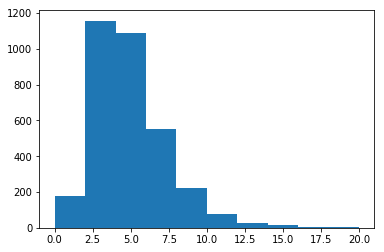

In [19]:
plt.hist(x="Intl Calls",data=churn_revised)

# Context:We are trying to predict whether a customer using a telecom service will leave the service or continue based on the existing information regarding demography and call details. The management of the telecom provider company are invested in this project.

# Need:Whether it is a telecom company or any other mid sized company or corporation, customers are the key revenue sources.Its important for companies to know how likely a customer will leave the service. Not only is it crucial for a company to know which customers will continue with the service but most importantly, which ones will tend to leave so that the focus can be towards retaining them

# Vision: The logic behind the solution is how the category of current serives and information regarding the customer affects the  final outcome of whether the customer will continue or leave. How much charges for example a customer incurs and the customers satisfaction level are some determinants of the final outcome 

# Outcome: Based on the outcome of how probably customers are leaving and staying will be informative for the higher management. The outcome of the result will help them make strategic decisions which will ultimately change the quality and cost of the services of the company. Finally, it is important to acquire new customers but even more important to retain the existing ones.
    

# seems to be little difference in quantiles of account lengths of people who have churned and those who have not. Account length therefore, does not seem like a crucial factor for predicting churn 

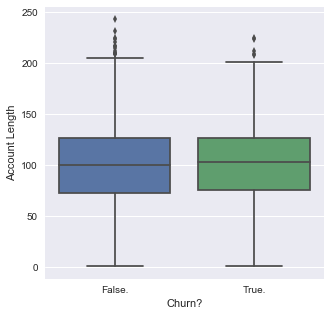

In [109]:
f, ax = plt.subplots(figsize=(5,5))
#sns.countplot(y="Account Length", data=churn,hue="Churn?");
sns.boxplot(x="Churn?", y="Account Length", data=churn);

# pairplots and heatmap to identify potential relations between predictors

# we notice Day-charge and Day-mins have a strong linear relationship. We also notice that the people having day charge and day mins towards the higher end are more likely to churn 

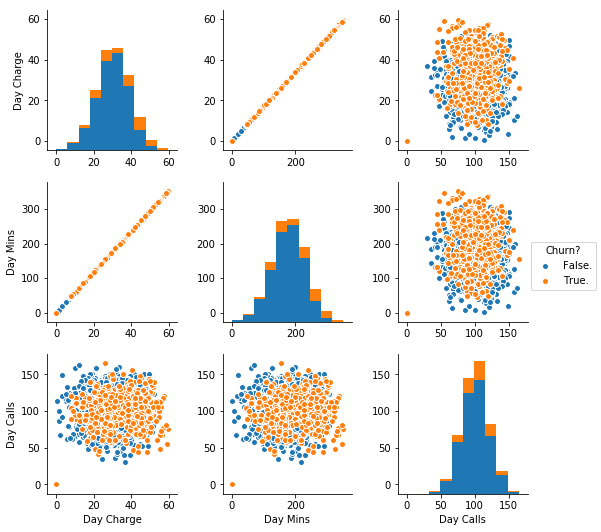

In [23]:
sns.pairplot(churn,vars=["Day Charge","Day Mins","Day Calls"],hue="Churn?")

# we notice again that night charge and night calls have a strong linear relationship but people towards the very higher side of night calls and charge are unlikely to churn 

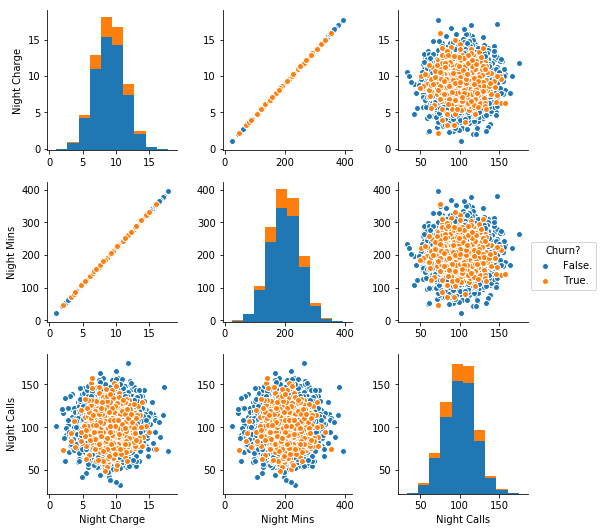

In [24]:
sns.pairplot(churn,vars=["Night Charge","Night Mins","Night Calls"],hue="Churn?")

# Customers with highest number of international calls have not churned

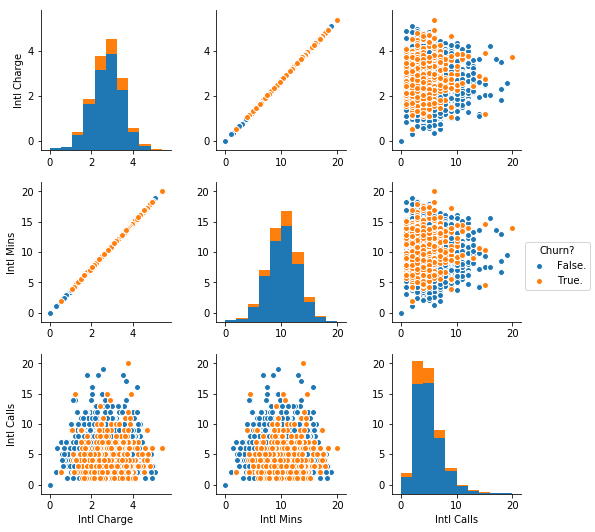

In [25]:
sns.pairplot(churn,vars=["Intl Charge","Intl Mins","Intl Calls"],hue="Churn?")

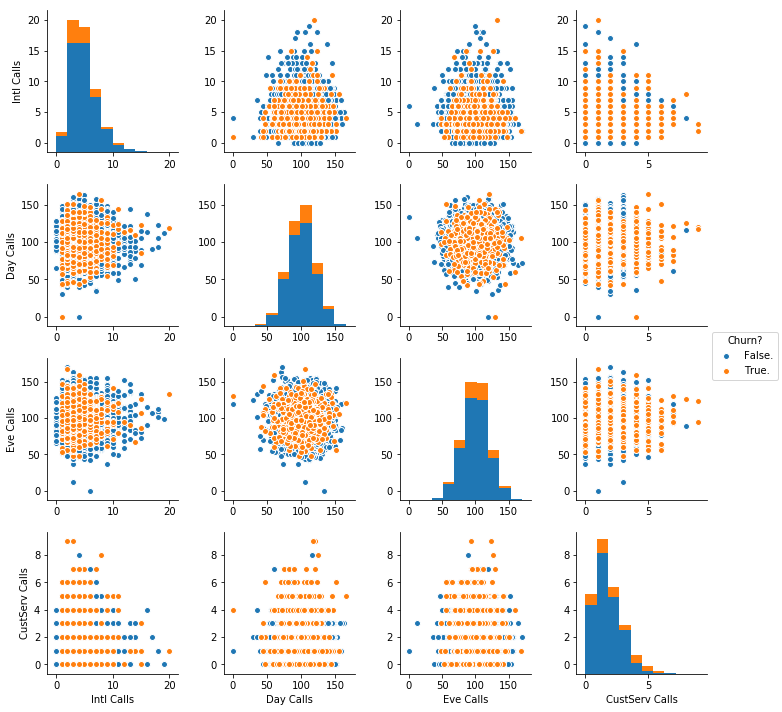

In [51]:
sns.pairplot(churn,vars=["Intl Calls","Day Calls","Eve Calls","CustServ Calls"],hue="Churn?")

# add dummy variables in category in order to make heatmap 

In [3]:
churn_intplan=pd.get_dummies(churn["Int'l Plan"],prefix=['International Plan'])
churn_vmail=pd.get_dummies(churn["VMail Plan"],prefix=['Vmail Plan'])
churn_TrueFalse=pd.get_dummies(churn["Churn?"],prefix=['Churn?'])
churn_revised=pd.concat([churn,churn_intplan,churn_vmail,churn_TrueFalse],axis=1)

# drop non integer and non floats for  heatmap

In [4]:
churn_revised.drop(["Int'l Plan","VMail Plan","Churn?","State","Area Code","Phone"],axis=1,inplace=True)


In [10]:
churn_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length                3333 non-null int64
VMail Message                 3333 non-null int64
Day Mins                      3333 non-null float64
Day Calls                     3333 non-null int64
Day Charge                    3333 non-null float64
Eve Mins                      3333 non-null float64
Eve Calls                     3333 non-null int64
Eve Charge                    3333 non-null float64
Night Mins                    3333 non-null float64
Night Calls                   3333 non-null int64
Night Charge                  3333 non-null float64
Intl Mins                     3333 non-null float64
Intl Calls                    3333 non-null int64
Intl Charge                   3333 non-null float64
CustServ Calls                3333 non-null int64
['International Plan']_no     3333 non-null uint8
['International Plan']_yes    3333 non-null uint8
['Vmail Plan']_no          

# heatmat


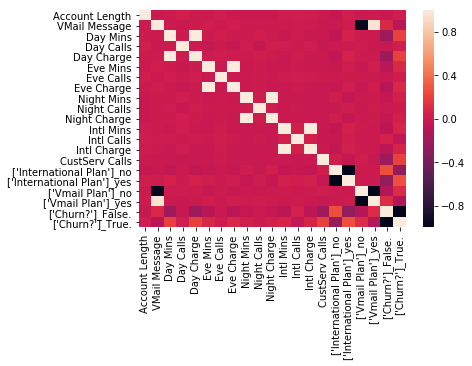

In [5]:
sns.heatmap(churn_revised.corr())

# based on the pairplots and heatmap, we make some changes in our dataset
#1.as noticed, naturally people with higher voice mail messages will have voice plan so we choose to drop voicemail messages
#2.People who make high number of day calls obviously have a day minutes and based on the correlation, we choose to drop day minutes
#3. For the same reason, we will drop evening minutes, night minutes and international minutes

dropping highly correlated variables

In [ ]:
churn_revised.drop(["VMail Message","Day Mins","Eve Mins","Night Mins","Intl Mins"],axis=1,inplace=True)

In [38]:
churn_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
Account Length                3333 non-null int64
Day Calls                     3333 non-null int64
Day Charge                    3333 non-null float64
Eve Calls                     3333 non-null int64
Eve Charge                    3333 non-null float64
Night Calls                   3333 non-null int64
Night Charge                  3333 non-null float64
Intl Calls                    3333 non-null int64
Intl Charge                   3333 non-null float64
CustServ Calls                3333 non-null int64
['International Plan']_no     3333 non-null uint8
['International Plan']_yes    3333 non-null uint8
['Vmail Plan']_no             3333 non-null uint8
['Vmail Plan']_yes            3333 non-null uint8
['Churn?']_False.             3333 non-null uint8
['Churn?']_True.              3333 non-null uint8
dtypes: float64(4), int64(6), uint8(6)
memory usage: 280.0 KB


# revised heatmap

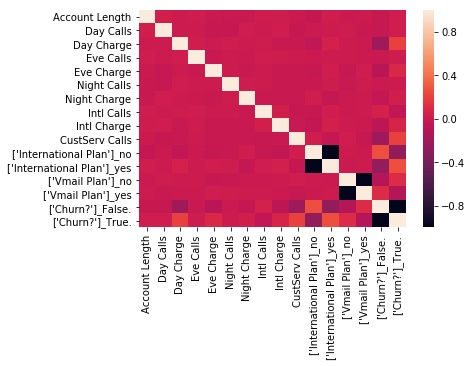

In [40]:
sns.heatmap(churn_revised.corr())

In [41]:
churn_revised.corr()

,Account Length,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,['International Plan']_no,['International Plan']_yes,['Vmail Plan']_no,['Vmail Plan']_yes,['Churn?']_False.,['Churn?']_True.
Account Length,1.000000,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.003796,-0.024735,0.024735,-0.002918,0.002918,-0.016541,0.016541
Day Calls,0.038470,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.018942,-0.003755,0.003755,0.011086,-0.011086,-0.018459,0.018459
Day Charge,0.006214,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094,-0.013427,-0.049398,0.049398,0.001686,-0.001686,-0.205151,0.205151
Eve Calls,0.019260,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674,0.002423,-0.006114,0.006114,0.006444,-0.006444,-0.009233,0.009233
Eve Charge,-0.006745,-0.021449,0.007036,-0.011423,1.000000,0.007596,-0.012601,0.002541,-0.011074,-0.012987,-0.019106,0.019106,-0.021559,0.021559,-0.092786,0.092786
Night Calls,-0.013176,-0.019557,0.022972,0.007710,0.007596,1.000000,0.011188,0.000305,-0.013630,-0.012802,-0.012451,0.012451,-0.015553,0.015553,-0.006141,0.006141
Night Charge,-0.008960,0.022927,0.004301,-0.002056,-0.012601,0.011188,1.000000,-0.012329,-0.015186,-0.009277,0.028913,-0.028913,-0.006064,0.006064,-0.035496,0.035496
Intl Calls,0.020661,0.004574,0.008032,0.017434,0.002541,0.000305,-0.012329,1.000000,0.032372,-0.017561,-0.017366,0.017366,-0.007618,0.007618,0.052844,-0.052844
Intl Charge,0.009546,0.021666,-0.010094,0.008674,-0.011074,-0.013630,-0.015186,0.032372,1.000000,-0.009675,-0.045780,0.045780,0.001276,-0.001276,-0.068259,0.068259
CustServ Calls,-0.003796,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,1.000000,0.024522,-0.024522,0.017824,-0.017824,-0.208750,0.208750


# there is further scope of improvement as not all predictors have an effect on the outcome

# based on the correlations- 
#1 we can drop account length as it has no connection with a customer churning
#2 the person making higher number of calls is probabily less likely to churn rather than the one who is charged more,
#so we will drop Day Calls, Evening Calls, Night Calls

In [43]:
churn_revised.drop(["Account Length","Eve Calls","Night Calls"],axis=1,inplace=True)

In [45]:
churn_revised.drop(["Day Calls"],axis=1,inplace=True)

# we notice a significant difference in our heatmap now 

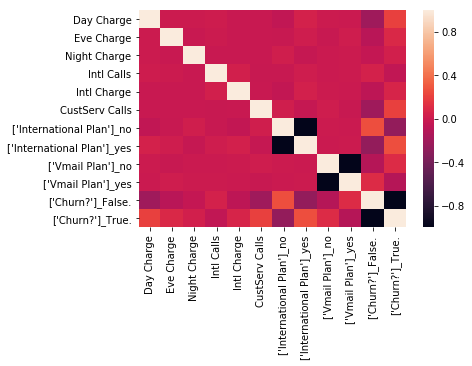

In [46]:
sns.heatmap(churn_revised.corr())

In [57]:
churn_revised.corr()

,Day Charge,Eve Charge,Night Charge,Intl Calls,Intl Charge,CustServ Calls,['International Plan']_no,['International Plan']_yes,['Vmail Plan']_no,['Vmail Plan']_yes,['Churn?']_False.,['Churn?']_True.
Day Charge,1.000000,0.007036,0.004301,0.008032,-0.010094,-0.013427,-0.049398,0.049398,0.001686,-0.001686,-0.205151,0.205151
Eve Charge,0.007036,1.000000,-0.012601,0.002541,-0.011074,-0.012987,-0.019106,0.019106,-0.021559,0.021559,-0.092786,0.092786
Night Charge,0.004301,-0.012601,1.000000,-0.012329,-0.015186,-0.009277,0.028913,-0.028913,-0.006064,0.006064,-0.035496,0.035496
Intl Calls,0.008032,0.002541,-0.012329,1.000000,0.032372,-0.017561,-0.017366,0.017366,-0.007618,0.007618,0.052844,-0.052844
Intl Charge,-0.010094,-0.011074,-0.015186,0.032372,1.000000,-0.009675,-0.045780,0.045780,0.001276,-0.001276,-0.068259,0.068259
CustServ Calls,-0.013427,-0.012987,-0.009277,-0.017561,-0.009675,1.000000,0.024522,-0.024522,0.017824,-0.017824,-0.208750,0.208750
['International Plan']_no,-0.049398,-0.019106,0.028913,-0.017366,-0.045780,0.024522,1.000000,-1.000000,0.006006,-0.006006,0.259852,-0.259852
['International Plan']_yes,0.049398,0.019106,-0.028913,0.017366,0.045780,-0.024522,-1.000000,1.000000,-0.006006,0.006006,-0.259852,0.259852
['Vmail Plan']_no,0.001686,-0.021559,-0.006064,-0.007618,0.001276,0.017824,0.006006,-0.006006,1.000000,-1.000000,-0.102148,0.102148
['Vmail Plan']_yes,-0.001686,0.021559,0.006064,0.007618,-0.001276,-0.017824,-0.006006,0.006006,-1.000000,1.000000,0.102148,-0.102148


# based on our context of predicting customer churn, following are the predictors that have the highest influence

In [48]:
churn_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
Day Charge                    3333 non-null float64
Eve Charge                    3333 non-null float64
Night Charge                  3333 non-null float64
Intl Calls                    3333 non-null int64
Intl Charge                   3333 non-null float64
CustServ Calls                3333 non-null int64
['International Plan']_no     3333 non-null uint8
['International Plan']_yes    3333 non-null uint8
['Vmail Plan']_no             3333 non-null uint8
['Vmail Plan']_yes            3333 non-null uint8
['Churn?']_False.             3333 non-null uint8
['Churn?']_True.              3333 non-null uint8
dtypes: float64(4), int64(2), uint8(6)
memory usage: 175.8 KB


# models valuations and feature selections to see if the analysis is coharent with the heatmap estimations

In [8]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import concat
from pandas import Series
from math import sqrt 
from datetime import datetime
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
!pip install plotly
import plotly.offline as py
#import mlxtend
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# converting strings to binary integers for model implementation

In [9]:
churn_proc=churn
number=LabelEncoder()
churn_proc["Churn?"]=number.fit_transform(churn_proc["Churn?"].astype('str'))
churn_proc["Int'l Plan"]=number.fit_transform(churn_proc["Int'l Plan"].astype('str'))
churn_proc["VMail Plan"]=number.fit_transform(churn_proc["VMail Plan"].astype('str'))
churn_proc=churn_proc.drop("Phone",axis=1)
churn_proc.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# for State, get dummies

In [10]:
churn_proc = pd.get_dummies(churn_proc, columns = ['State'])
churn_proc.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


# train test split

In [11]:
df=churn_proc 
from sklearn.model_selection import train_test_split
X = df.drop("Churn?",axis=1)
y = df["Churn?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Decision Trees 

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Classification report for Classification tree- model had a 94% accuracy in predicting the customers who actually did not churn but a poorer accuary of 78% in terms of people who actually did churn and that is crucial to the business

In [105]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       560
          1       0.78      0.70      0.74       107

avg / total       0.92      0.92      0.92       667



# model predicted much better the actual outcome of people who did not churn then who did 

In [106]:
print(confusion_matrix(y_test,predictions))

[[539  21]
 [ 32  75]]


# accuracy

In [107]:
print("Accuracy", metrics.accuracy_score(y_test,predictions))

Accuracy 0.9205397301349325


area under curve is 0.83 

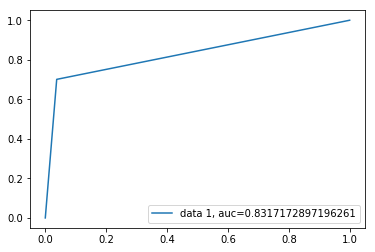

In [108]:
y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

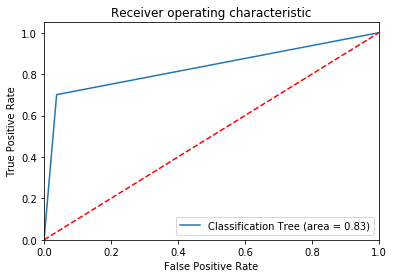

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classification Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model satisfactory and far from the 45 degree line

In [42]:
def plotLiftChart(actual, predicted):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title('Lift Chart')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.legend(loc="best")

# Lift chart showing how close prediction is to actual. 

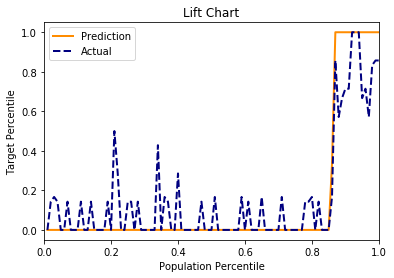

In [111]:
plotLiftChart(y_test,predictions)

# Random Forest

# Performing feature selection using 10 fold cross validations

In [30]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier


# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf, step=1, cv=10,scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 17
Best features : Index(['Account Length', 'Int'l Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls'],
      dtype='object')


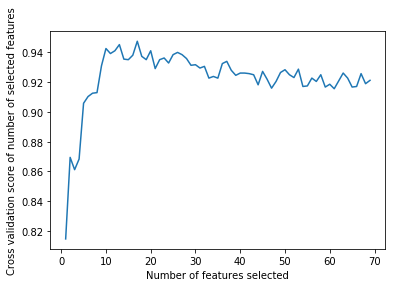

In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Based on the plot, we find around 17 predictors to be the ideal choice for the model 

Feature ranking:
1. feature 5 (0.138436)
2. feature 17 (0.110636)
3. feature 7 (0.107207)
4. feature 8 (0.062786)
5. feature 10 (0.054098)
6. feature 2 (0.050836)
7. feature 14 (0.049232)
8. feature 0 (0.038549)
9. feature 13 (0.038133)
10. feature 6 (0.037406)
11. feature 16 (0.035847)
12. feature 15 (0.035805)
13. feature 11 (0.035090)
14. feature 12 (0.034873)
15. feature 9 (0.032550)
16. feature 3 (0.023981)
17. feature 4 (0.021773)
18. feature 1 (0.009715)
19. feature 61 (0.004909)
20. feature 58 (0.003303)
21. feature 41 (0.003259)
22. feature 22 (0.003105)
23. feature 27 (0.003101)
24. feature 62 (0.002935)
25. feature 44 (0.002818)
26. feature 36 (0.002772)
27. feature 49 (0.002450)
28. feature 32 (0.002423)
29. feature 64 (0.002389)
30. feature 37 (0.002367)
31. feature 43 (0.002323)
32. feature 31 (0.002154)
33. feature 52 (0.002073)
34. feature 48 (0.001972)
35. feature 38 (0.001944)
36. feature 55 (0.001897)
37. feature 25 (0.001882)
38. feature 66 (0.001834)
39. feature 28

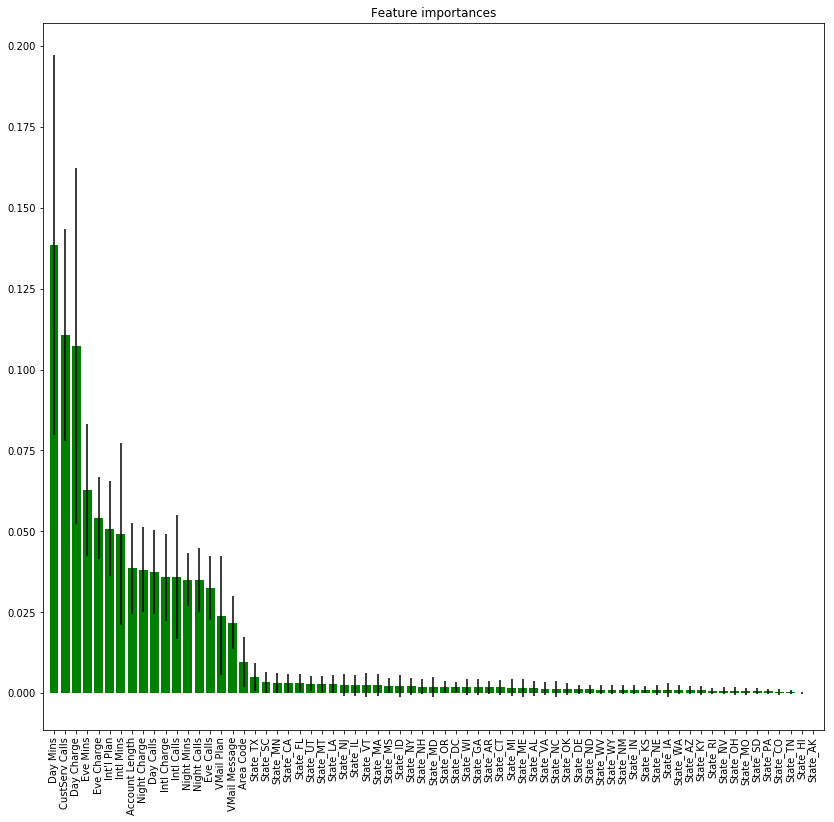

In [45]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# we got the best features and on those features and now we will modify our dataframe

In [33]:
features=['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls']

X_1=churn_proc[features]
y_1=churn_proc["Churn?"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.20)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
clf_rfc_pred = clf_rf.predict(X1_test)

In [36]:
print(confusion_matrix(y1_test,clf_rfc_pred))

[[566   6]
 [ 32  63]]


# We have a much better prediction of customers who actually left and the ones who did not leave as well.

In [37]:
print(classification_report(y1_test,clf_rfc_pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       572
          1       0.91      0.66      0.77        95

avg / total       0.94      0.94      0.94       667



In [38]:
#accuracy
print("Accuracy", metrics.accuracy_score(y1_test,clf_rfc_pred))

Accuracy 0.9430284857571214


# Area under curve is 0.92 which is quite close to 1 denoting a good fit

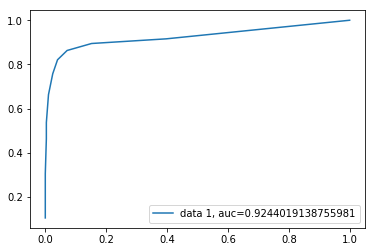

In [39]:
y_pred_proba = clf_rf.predict_proba(X1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# The curve is satisfactorily far from the 45 degree line 

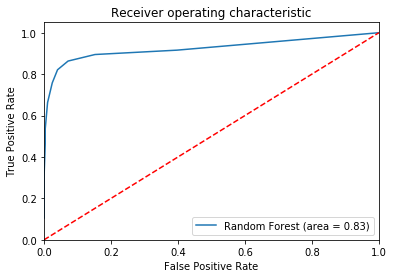

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, clf_rf.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, clf_rf.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Lift chart

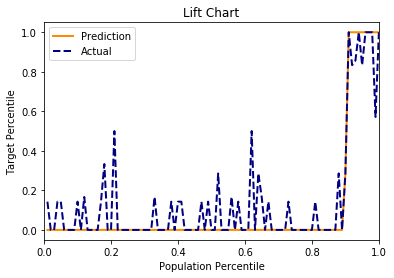

In [43]:
plotLiftChart(y1_test,clf_rfc_pred)

# KNN

In [7]:
#Standardizing the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
L=X
n=y
scaler.fit(L)
scaled_features = scaler.transform(L)
df_feat = pd.DataFrame(scaled_features,columns=L.columns)
df_feat.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
1,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
2,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
3,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
4,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781


In [8]:
import mlxtend 
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [9]:
knn = KNeighborsClassifier(n_neighbors=69)

In [23]:
M=X.values
b=y.values

# Performing feature selection to determine the correct complexity of model 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   24.0s finished

[2018-03-27 17:12:53] Features: 1/17 -- score: 0.8658925392458328[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    7.3s finished

[2018-03-27 17:13:01] Features: 2/17 -- score: 0.8775934617251983[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:   10.1s finished

[2018-03-27 17:13:11] Features: 3/17 -- score: 0.8883889877901854[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   12.2s finished

[2018-03-27 17:13:23] Features: 4/17 -- score: 0.88868838898779[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   12.

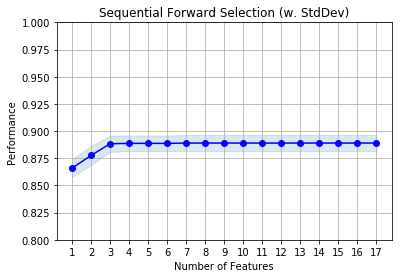

In [24]:
sfs = SFS(knn, 
          k_features=17, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=10)

sfs = sfs.fit(M, b)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

# Based on the confidence intervals and performance, we will take 3 predictors in our final prediction model

In [25]:
M_train, M_test, b_train, b_test = train_test_split(
         M, b, test_size=0.2, random_state=1)

knn = KNeighborsClassifier(n_neighbors=69)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=10)
sfs1 = sfs1.fit(M_train, b_train)

# Fit the estimator using the new feature subset and make a prediction on the test data

In [26]:
M_train_sfs = sfs1.transform(M_train)
M_test_sfs = sfs1.transform(M_test)


knn.fit(M_train_sfs, b_train)
b_pred = knn.predict(M_test_sfs)

# Compute the accuracy of the prediction
acc = float((b_test == b_pred).sum()) / b_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 88.91 %


# Logistic Regression

# Perform feature selection using 10 fold cross validation and determining the correct model complexity

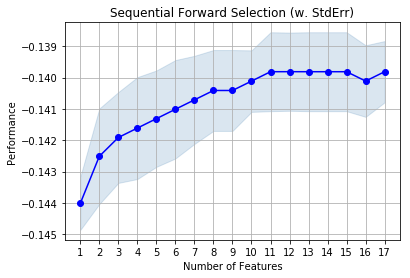

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

sfs = SFS(lr, 
          k_features=17, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(M, b)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# Based on the performance and confidence intervals, we will idealy choose 6 predictors in our logistic regression model

In [29]:
#choose 6 features from the plot
M_train, M_test, b_train, b_test = train_test_split(
         M, b, test_size=0.2, random_state=1)
sfs1 = SFS(lr, 
           k_features=6, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=10)
sfs1 = sfs1.fit(M_train, b_train)
print('Selected features:', sfs1.k_feature_idx_)


Selected features: (17, 20, 35, 40, 41, 62)


In [41]:
M_train_sfs = sfs1.transform(M_train)
M_test_sfs = sfs1.transform(M_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
lr.fit(M_train_sfs, b_train)
b_pred = lr.predict(M_test_sfs)

# Compute the accuracy of the prediction
acc = float((b_test == b_pred).sum()) / b_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 85.01 %


# Our final test set accuracy of the logistic regression model after feature selection is around 85%

# SVM

# Perform feature selection using 10 fold cross validation and determining the correct model complexity

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   36.1s finished

[2018-03-27 18:17:11] Features: 1/17 -- score: 0.8664865765315539[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:  1.6min finished

[2018-03-27 18:18:48] Features: 2/17 -- score: 0.8802891347119234[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:  2.0min finished

[2018-03-27 18:20:48] Features: 3/17 -- score: 0.8967939453696575[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:  2.0min finished

[2018-03-27 18:22:49] Features: 4/17 -- score: 0.9009922966444706[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  1.

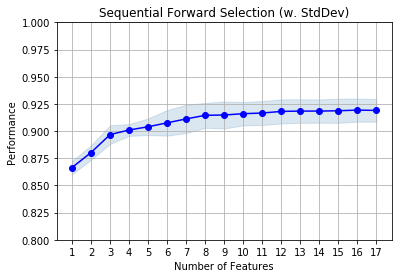

In [47]:
from sklearn.svm import SVC
model = SVC()
sfs = SFS(model, 
          k_features=17, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

sfs = sfs.fit(M, b)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

# Based on the performance and confidence intervals, we will choose 6 predictors in our final prediction model 

In [50]:
M_train, M_test, b_train, b_test = train_test_split(
         M, b, test_size=0.2, random_state=1)
sfs1 = SFS(model, 
           k_features=6, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=10)
sfs1 = sfs1.fit(M_train, b_train)
print('Selected features:', sfs1.k_feature_idx_)


Selected features: (2, 3, 7, 10, 17, 29)


In [51]:
M_train_sfs = sfs1.transform(M_train)
M_test_sfs = sfs1.transform(M_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
model.fit(M_train_sfs, b_train)
b_pred = model.predict(M_test_sfs)

# Compute the accuracy of the prediction
acc = float((b_test == b_pred).sum()) / b_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100)) 

Test set accuracy: 90.55 %


# After feature selection and testing on test set, the accuracy is 90.55%

# Of all the models tested, these are the final accuaracy based ranking-
1. Random Forest - 94.3%
2. Classification Tree- 92%
3. Support Vector Machines- 90%
4. K Nearest Neighbors - 88%
5. Logistic Regression- 85% 

Our best model is Random Forest based on the accuracy.

# The features used in the final Random Forest Model - 'Account Length', 'Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls'